In [1]:
import numpy as np
import matplotlib.pyplot as plt

# makes printing more human-friendly
np.set_printoptions(precision=3, suppress=True)

Mounted at /content/drive


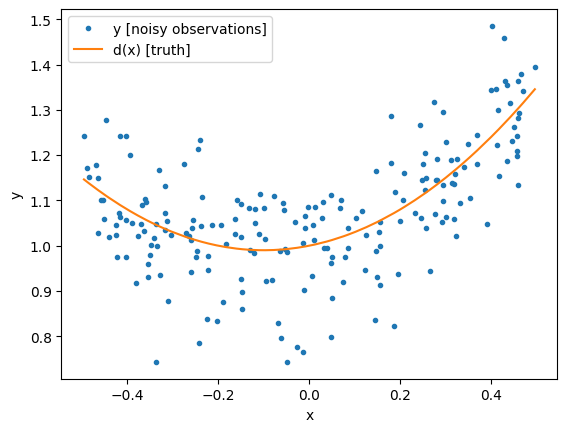

In [2]:
# Load the data
colab=True
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    with open('/content/drive/MyDrive/Colab Notebooks/Ex_poly_data.csv', 'r') as f:
      data = np.genfromtxt(f,delimiter=',')
else:
    with open('Ex_poly_data.csv', 'r') as f:
        data = np.genfromtxt(f,delimiter=',')

plt.plot(data[:, 0], data[:, 1], '.', label='y [noisy observations]');
plt.plot(data[:, 0], data[:, 2], '-', label='d(x) [truth]');
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
data_trainval, data_test = train_test_split(data, train_size=0.85)
data_train, data_val = train_test_split(data_trainval, train_size=0.7/0.85)

x_train = data_train[:,0]
y_train = data_train[:,1]

x_val = data_val[:,0]
y_val = data_val[:,1]

x_test = data_test[:,0]
y_test = data_test[:,1]

print('x_train', x_train.shape)
print('x_val', x_val.shape)
print('x_test', x_test.shape)


x_train (140,)
x_val (30,)
x_test (30,)


X: (140, 1) [0.456]
w = [0.234] b = 1.0792686674487704
X: (140, 2) [0.456 0.208]
w = [0.235 0.998] b = 0.9935921751203336
X: (140, 3) [0.456 0.208 0.095]
w = [ 0.28   0.996 -0.294] b = 0.9939978855482215
X: (140, 4) [0.456 0.208 0.095 0.043]
w = [ 0.278  0.731 -0.28   1.225] b = 1.0005793958039637
X: (140, 5) [0.456 0.208 0.095 0.043 0.02 ]
w = [  0.052   0.856   4.112   0.635 -16.144] b = 0.9971141852370026
X: (140, 6) [0.456 0.208 0.095 0.043 0.02  0.009]
w = [  0.055   1.082   4.033  -2.195 -15.803   8.621] b = 0.9945107399650868
X: (140, 7) [0.456 0.208 0.095 0.043 0.02  0.009 0.004]
w = [  0.015   1.082   5.435  -2.216 -28.207   8.809  31.197] b = 0.9943711241816557
X: (140, 8) [0.456 0.208 0.095 0.043 0.02  0.009 0.004 0.002]
w = [   0.005    0.131    5.665   18.557  -29.531 -133.711   33.698  303.939] b = 1.0009137861247435
X: (140, 9) [0.456 0.208 0.095 0.043 0.02  0.009 0.004 0.002 0.001]
w = [   0.006    0.13     5.638   18.565  -29.11  -133.765   31.294  304.047
    4.523] b

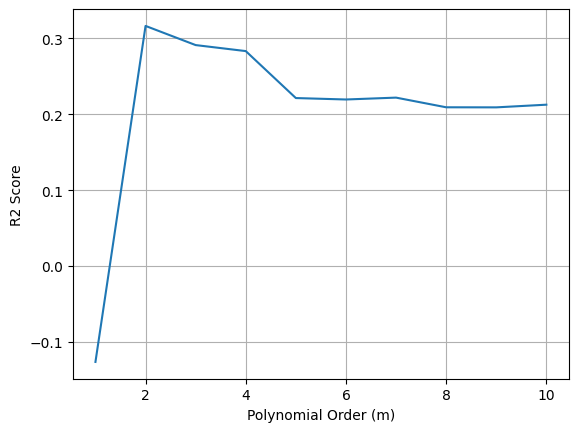

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def train_polyreg_model(x, y, order=3):
    # Create matrix X. X should be an Nxm matrix, where each row is [x, x^2, ..., x^m]
    # Refer to np.stack or np.concatenate to create a matrix from multiple vectors
    X = np.column_stack([x**i for i in range(1, order+1)])

    # Verify the result
    print('X:', X.shape, X[1]) # X should be an Nxm matrix, where each row is [x, x^2, ..., x^m]

    # Use LinearRegression to fit a model to X
    model = LinearRegression()
    model.fit(X, y)
    print('w =', model.coef_, 'b =', model.intercept_) # Does the shape of w make sense?
    return model

def predict_polyreg_model(model, x):
    order = len(model.coef_)

    # Create matrix X. X should be an Nxm matrix, where each row is [x, x^2, ..., x^m]
    X = np.column_stack([x**i for i in range(1, order+1)])

    # Predict the samples in X using our model
    yhat = model.predict(X)

    return yhat

order_list = range(1, 11)
r2_list = []
for order in order_list:
    model = train_polyreg_model(x_train, y_train, order)  # Train the model on the training data
    yhat_val = predict_polyreg_model(model, x_val)  # Predict the validation data
    r2 = r2_score(y_val, yhat_val)  # Assess your predictions using r2_score between predictions and the observed independent variable y
    r2_list.append(r2)

print('R2 Scores:', np.array(r2_list))

plt.plot(order_list, r2_list);
plt.xlabel('Polynomial Order (m)')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

X: (140, 1) [0.456]
w = [0.234] b = 1.0792686674487704
X: (140, 2) [0.456 0.208]
w = [0.235 0.998] b = 0.9935921751203336
X: (140, 3) [0.456 0.208 0.095]
w = [ 0.28   0.996 -0.294] b = 0.9939978855482215
X: (140, 4) [0.456 0.208 0.095 0.043]
w = [ 0.278  0.731 -0.28   1.225] b = 1.0005793958039637
X: (140, 5) [0.456 0.208 0.095 0.043 0.02 ]
w = [  0.052   0.856   4.112   0.635 -16.144] b = 0.9971141852370026
X: (140, 6) [0.456 0.208 0.095 0.043 0.02  0.009]
w = [  0.055   1.082   4.033  -2.195 -15.803   8.621] b = 0.9945107399650868
X: (140, 7) [0.456 0.208 0.095 0.043 0.02  0.009 0.004]
w = [  0.015   1.082   5.435  -2.216 -28.207   8.809  31.197] b = 0.9943711241816557
X: (140, 8) [0.456 0.208 0.095 0.043 0.02  0.009 0.004 0.002]
w = [   0.005    0.131    5.665   18.557  -29.531 -133.711   33.698  303.939] b = 1.0009137861247435
X: (140, 9) [0.456 0.208 0.095 0.043 0.02  0.009 0.004 0.002 0.001]
w = [   0.006    0.13     5.638   18.565  -29.11  -133.765   31.294  304.047
    4.523] b

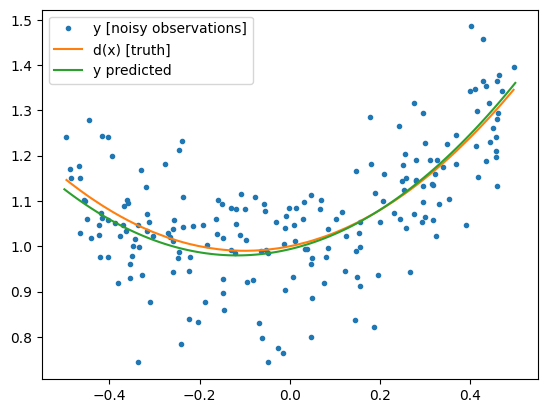

In [8]:
optimal_order = None
best_r2 = -1

for order in order_list:
    model = train_polyreg_model(x_train, y_train, order)  # Train the model on the training data
    yhat_val = predict_polyreg_model(model, x_val)  # Predict the validation data
    r2 = r2_score(y_val, yhat_val)  # Calculate R-squared score on validation data

    if r2 > best_r2:
        best_r2 = r2
        optimal_order = order


optimal_model = train_polyreg_model(x_train, y_train, optimal_order)
yhat_test = predict_polyreg_model(optimal_model, x_test)
r2 = r2_score(y_test, yhat_test)
print('R2 score on Test Data:', r2)

# Plot model predictions
x_range = np.linspace(-0.5, 0.5, 100)
yhat_range = predict_polyreg_model(optimal_model, x_range)

plt.plot(data[:, 0], data[:, 1], '.', label='y [noisy observations]')
plt.plot(data[:, 0], data[:, 2], '-', label='d(x) [truth]')
plt.plot(x_range, yhat_range, '-', label='y predicted')
plt.legend()
plt.show()
